Using [UC Irvine Heart Disease dataset](https://archive-beta.ics.uci.edu/ml/datasets/heart+disease). The modified cleve.mod version was used. <b>Rename cleve.mod to clevemod.txt<b>.

Full citation: Janosi, Andras, Steinbrunn, William, Pfisterer, Matthias, Detrano, Robert & M.D., M.D.. (1988). Heart Disease. UCI Machine Learning Repository.

This is Dr. Detrano's database modified to be a real MIXED dataset.

Attributes: 8 symbolic, 6 numeric.
  Age; sex; chest pain type (angina, abnang, notang, asympt)
  Trestbps (resting blood pres); cholesteral; fasting blood sugar < 120
  (true or false); resting ecg (norm, abn, hyper); max heart rate; 
  exercise induced angina (true or false); oldpeak; slope (up, flat, down)
  number of vessels colored (???); thal (norm, fixed, rever). Finally, the
  class is either healthy (buff) or with heart-disease (sick).

# Import dataset and clean

In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# dislpay full column widths and all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

Uncomment the code cell below to convert the original tab-delimited clevemod.txt file into a .csv file.

In [3]:
# convert the tab delimited .txt file into a .csv file

# with open(yourfilein) as f_in, open(yourfileout, 'w') as f_out:
#     o = csv.writer(f_out)
#     for line in f_in:
#         o.writerow(line.split())

In [4]:
cv_df = pd.read_csv('/media/veracrypt3/Cloud/Datasets/clevemod.csv')

In [5]:
cv_df.head()

,age,sex,chest_pain_type,trestbps,cholesterol,fasting_blood_sugar_less120,rest_ecg,max_hr,exercise_induced_angina,oldpeak,slope,num_vessel_colored,thal,class,unknown
0,63.0,male,angina,145.0,233.0,true,hyp,150.0,fal,2.3,down,0.0,fix,buff,H
1,67.0,male,asympt,160.0,286.0,fal,hyp,108.0,true,1.5,flat,3.0,norm,sick,S2
2,67.0,male,asympt,120.0,229.0,fal,hyp,129.0,true,2.6,flat,2.0,rev,sick,S1
3,37.0,male,notang,130.0,250.0,fal,norm,187.0,fal,3.5,down,0.0,norm,buff,H
4,41.0,fem,abnang,130.0,204.0,fal,hyp,172.0,fal,1.4,up,0.0,norm,buff,H


In [6]:
# the column unknown was labelled by me, it's meaning is not explained in the info above so let's just drop it
cv_df.drop(['unknown'], axis=1, inplace=True)

cv_df.head()

,age,sex,chest_pain_type,trestbps,cholesterol,fasting_blood_sugar_less120,rest_ecg,max_hr,exercise_induced_angina,oldpeak,slope,num_vessel_colored,thal,class
0,63.0,male,angina,145.0,233.0,true,hyp,150.0,fal,2.3,down,0.0,fix,buff
1,67.0,male,asympt,160.0,286.0,fal,hyp,108.0,true,1.5,flat,3.0,norm,sick
2,67.0,male,asympt,120.0,229.0,fal,hyp,129.0,true,2.6,flat,2.0,rev,sick
3,37.0,male,notang,130.0,250.0,fal,norm,187.0,fal,3.5,down,0.0,norm,buff
4,41.0,fem,abnang,130.0,204.0,fal,hyp,172.0,fal,1.4,up,0.0,norm,buff


In [7]:
cv_df.shape # should be 303 rows and 14 columns

(303, 14)

In [16]:
cv_df.describe(include='all')

,age,sex,chest_pain_type,trestbps,cholesterol,fasting_blood_sugar_less120,rest_ecg,max_hr,exercise_induced_angina,oldpeak,slope,num_vessel_colored,thal,class
count,303.000000,303,303,303.000000,303.000000,303,303,303.000000,303,303.000000,303,303,303,303
unique,NaN,2,4,NaN,NaN,2,3,NaN,2,NaN,3,5,4,2
top,NaN,male,asympt,NaN,NaN,fal,norm,NaN,fal,NaN,up,0.0,norm,buff
freq,NaN,207,143,NaN,NaN,258,152,NaN,204,NaN,142,175,166,165
mean,54.366337,NaN,NaN,131.623762,246.264026,NaN,NaN,149.646865,NaN,1.039604,NaN,NaN,NaN,NaN
std,9.082101,NaN,NaN,17.538143,51.830751,NaN,NaN,22.905161,NaN,1.161075,NaN,NaN,NaN,NaN
min,29.000000,NaN,NaN,94.000000,126.000000,NaN,NaN,71.000000,NaN,0.000000,NaN,NaN,NaN,NaN
25%,47.500000,NaN,NaN,120.000000,211.000000,NaN,NaN,133.500000,NaN,0.000000,NaN,NaN,NaN,NaN
50%,55.000000,NaN,NaN,130.000000,240.000000,NaN,NaN,153.000000,NaN,0.800000,NaN,NaN,NaN,NaN
75%,61.000000,NaN,NaN,140.000000,274.500000,NaN,NaN,166.000000,NaN,1.600000,NaN,NaN,NaN,NaN


In [8]:
cv_df.dtypes

age                            float64
sex                             object
chest_pain_type                 object
trestbps                       float64
cholesterol                    float64
fasting_blood_sugar_less120     object
rest_ecg                        object
max_hr                         float64
exercise_induced_angina         object
oldpeak                        float64
slope                           object
num_vessel_colored              object
thal                            object
class                           object
dtype: object

In [9]:
# see if there are any missing values
cv_df.isnull().sum()

age                            0
sex                            0
chest_pain_type                0
trestbps                       0
cholesterol                    0
fasting_blood_sugar_less120    0
rest_ecg                       0
max_hr                         0
exercise_induced_angina        0
oldpeak                        0
slope                          0
num_vessel_colored             0
thal                           0
class                          0
dtype: int64

In [10]:
cv_df['chest_pain_type'].value_counts()

asympt    143
notang     87
abnang     50
angina     23
Name: chest_pain_type, dtype: int64

# Visualize the data with seaborn

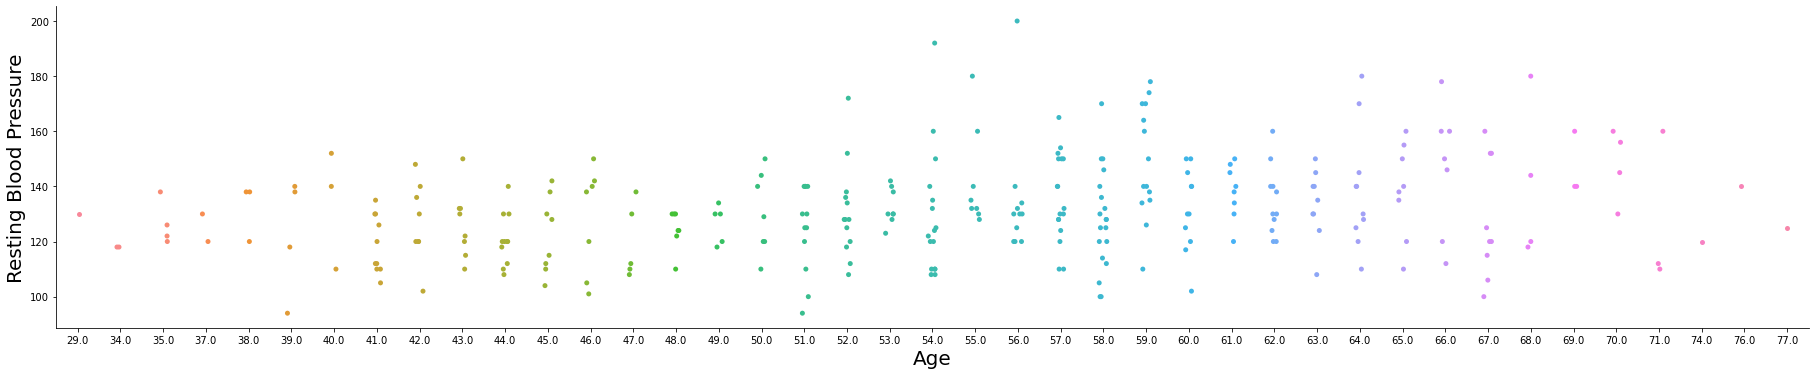

In [11]:
sns.catplot(x='age', y='trestbps', data=cv_df, aspect=5)
plt.ylabel('Resting Blood Pressure', fontsize=20)
plt.xlabel('Age', fontsize=20)
plt.show()

Some resting blood pressures are seen to be considerably higher starting at age 52. 

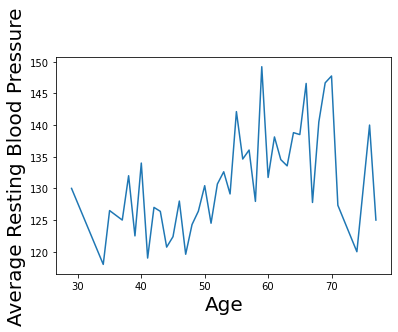

In [12]:
age_restbp_group = cv_df.groupby(['age']).mean('trestbps').reset_index()
sns.lineplot(x='age', y='trestbps', data=age_restbp_group)
plt.xlabel('Age', fontsize=20)
plt.ylabel('Average Resting Blood Pressure', fontsize=20)
plt.show()

General trend of increasing resting blood pressure with age. However, some of the younger and older ages have few datapoints so are not well representative of their age groups.